In [789]:
import sys
# !{sys.executable} -m pip install scipy
!{sys.executable} -m pip install matplot

from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import math

from IPython.display import display, Math

In [790]:
def printLatex(string):
    display(Math(string))

In [791]:

def tTable(df, alpha, tail):
    if(tail == "two"):
        plotGraph(stats.t.ppf(alpha/2, df), stats.t.ppf(1-alpha/2, df), tail)
        return stats.t.ppf(1-alpha/2, df)

    elif(tail == "left"):
        plotGraph(-math.inf, stats.t.ppf(alpha, df), tail)
        return stats.t.ppf(alpha, df)

    elif(tail == "right"):
        plotGraph(stats.t.ppf(1-alpha, df), math.inf, tail)
        return stats.t.ppf(1-alpha, df)

In [792]:

def zTable(alpha, tail):
    if(tail == "two"):
        plotGraph(stats.norm.ppf(1-alpha/2), stats.norm.ppf(alpha/2), "two")
        return stats.norm.ppf(1-alpha/2)

    elif(tail == "left"):
        plotGraph(stats.norm.ppf(alpha), -math.inf, "left")
        return stats.norm.ppf(alpha)

    elif(tail == "right"):
        plotGraph(math.inf, stats.norm.ppf(1-alpha), "right")
        return stats.norm.ppf(1-alpha)

In [793]:
def plotGraph(zvalue, zvalue2, tail):
    # plot the normal distribution
    fig, ax = plt.subplots(1, 1)
    x = np.linspace(-4, 4, 100)
    ax.plot(x, stats.norm.pdf(x), 'r-', lw=5, alpha=0.6, label='norm pdf')
    ax.axvline(zvalue, color='b', linestyle='--', label='z-value')
    ax.axvline(zvalue2, color='b', linestyle='--', label='z-value')

    if(tail == "two"):
        # plot the two tailed area
        ax.fill_between(x, 0, stats.norm.pdf(x), where=(x > zvalue) | (x < zvalue2), color='red')
    if(tail == "left"):
        # plot the left tailed area
        ax.fill_between(x, 0, stats.norm.pdf(x), where=(x < zvalue), color='red')
    if(tail == "right"):
        # plot the right tailed area
        ax.fill_between(x, 0, stats.norm.pdf(x), where=(x > zvalue2), color='red')

    plt.show()

In [794]:
def fTest(alpha, df1, df2):
    return stats.f.ppf(alpha, df1, df2)

In [795]:
def hypothesisTwoPopulationsF(o1, o2, n1, n2, alpha, tail):

        # for two populations with unequal variances

        # print variance 1
        printLatex("o_1 = " + str(o1))

        # print variance 1
        printLatex("o_2 = " + str(o1))

        f = 0
        if(o1 > o2):
                f = o1/o2
        else :
                f = o2/o1

        f = round(f, 4)
        
        printLatex("f = \\frac{o_1}{o_2} = " + str(f))
        
        df1 = n1 - 1
        df2 = n2 - 1
        printLatex("df_1 = n_1 - 1 = " + str(df1))
        printLatex("df_2 = n_2 - 1 = " + str(df2))

        criticalF = 0
        
        if(tail == "two"):
                criticalF1 = fTest(alpha/2, df1, df2)
                printLatex("F_1 = F(" + str(alpha/2) + ", " + str(df1) + ", " + str(df2) + ") = " + str(criticalF1))

                criticalF2 = fTest(1-alpha/2, df1, df2)
                printLatex("F_2 = F(" + str(1-alpha/2) + ", " + str(df1) + ", " + str(df2) + ") = " + str(criticalF2))
                if(f > criticalF1 and f < criticalF2):
                        printLatex("f \\in (" + str(criticalF1) + ", " + str(criticalF2) + ") Accept H_0")
                else:
                        printLatex("f \\notin (" + str(criticalF1) + ", " + str(criticalF2) + ") Reject H_0")
        if(tail == "left"):
                criticalF = fTest(alpha, df1, df2)
                printLatex("F = F(" + str(alpha) + ", " + str(df1) + ", " + str(df2) + ") = " + str(criticalF))
                if(f < criticalF):
                        printLatex("f < " + str(criticalF) + " Accept H_0")
                else:
                        printLatex("f > " + str(criticalF) + " Reject H_0")
        if(tail == "right"):
                criticalF = fTest(1-alpha, df1, df2)
                printLatex("F = F(" + str(1-alpha) + ", " + str(df1) + ", " + str(df2) + ") = " + str(criticalF))
                if(f > criticalF):
                        printLatex("f > " + str(criticalF) + " Accept H_0")
                else:
                        printLatex("f < " + str(criticalF) + " Reject H_0")
        
        return f, criticalF
        


In [796]:

def hypothesisTwoPopulationsPaired(dbar, sd, n, alpha, tail):
    # dbar = mean of differences
    # sd = standard deviation of differences
    # n = number of observations


    # t statistic
    t = dbar/(sd/math.sqrt(n))
    t = round(t, 4)
    printLatex("t = \\frac{\\bar{d}}{s_d/\\sqrt{n}}")
    

    df = n - 1
    printLatex("df = n - 1 = " + str(df))

    criticalT = 0
    reject = False
    if(tail == "two"):
        criticalT = tTable(df, alpha, tail)
        printLatex("t = t(" + str(1-alpha/2) + ", " + str(df) + ") = " + str(criticalT))
        if(t > criticalT):
            printLatex("t > " + str(criticalT) + " Reject H_0")
            reject = True
        else:
            printLatex("t < " + str(criticalT) + " Accept H_0")
    if(tail == "left"):
        criticalT = tTable(df, alpha, tail)
        printLatex("t = t(" + str(alpha) + ", " + str(df) + ") = " + str(criticalT))
        if(t < criticalT):
            printLatex("t < " + str(criticalT) + " Reject H_0")
            reject = True
        else:
            printLatex("t > " + str(criticalT) + " Accept H_0")
    if(tail == "right"):
        criticalT = tTable(df, alpha, tail)
        printLatex("t = t(" + str(1-alpha) + ", " + str(df) + ") = " + str(criticalT))
        if(t > criticalT):
            printLatex("t > " + str(criticalT) + " Reject H_0")
            reject = True
        else:
            printLatex("t < " + str(criticalT) + " Accept H_0")

    return t, criticalT, reject


In [797]:
def hypothesisTestingCase1(x, mu, std, pop, alpha, tail):
    # calculate the z statistic
    z = (x - mu) / (std / math.sqrt(pop))
    z = round(z, 4)
    printLatex("z = \\frac{" + str(x) + " - " + str(mu) + "}{" + str(std) + " / \\sqrt{" + str(pop) + "}} = " + str(z))

    # critical value
    c = zTable(alpha, tail)

    # reject
    reject = False
    if(tail == "two"):
        if(z > zTable(alpha/2, "right")):
            reject = True
            c = zTable(alpha/2, "right")
        elif(z < zTable(alpha/2, "left")):
            reject = True
            c = zTable(alpha/2, "left")
            printLatex("z < " + str(c) + " \\Rightarrow \\text{Reject } H_0")
        elif(z > zTable(alpha/2, "left") and z < zTable(alpha/2, "right")):
            reject = False
            printLatex("z > " + str(c) + " \\Rightarrow \\text{Fail to reject } H_0")
    if(tail == "left"):
        if(z < zTable(alpha, "left")):
            c = zTable(alpha, "left")
            printLatex("z < " + str(c) + " \\Rightarrow \\text{Reject } H_0")
            reject = True
        else:
            printLatex("z > " + str(c) + " \\Rightarrow \\text{Fail to reject } H_0")
    if(tail == "right"):
        if(z > zTable(alpha, "right")):
            c = zTable(alpha, "right")
            printLatex("z > " + str(c) + " \\Rightarrow \\text{Reject } H_0")
            reject = True
        else:
            printLatex("z < " + str(c) + " \\Rightarrow \\text{Fail to reject } H_0")
        
    return z, c, reject
        
    

In [798]:
def hypothesisTestingCase2(X, mu, S, pop, alpha, tail):
    # population variance unknown
    # calculate the z statistic

    z = (X - mu) / (S / math.sqrt(pop))
    z = round(z, 4)
    printLatex("z = \\frac{" + str(X) + " - " + str(mu) + "}{" + str(S) + " / \\sqrt{" + str(pop) + "}} = " + str(z))

    c = zTable(alpha, tail)

    reject = False
    if(tail == "two"):
        if(z > zTable(alpha/2, "right")):
            reject = True
            c = zTable(alpha/2, "right")
            printLatex("z > " + str(c) + " \\Rightarrow \\text{Reject } H_0")
        if(z < zTable(alpha/2, "left")):
            reject = True
            c = zTable(alpha/2, "left")
            printLatex("z < " + str(c) + " \\Rightarrow \\text{Reject } H_0")
        elif(z > zTable(alpha/2, "left") and z < zTable(alpha/2, "right")):
            reject = False
            printLatex("z >= " + str(c) + " \\Rightarrow \\text{Fail to reject } H_0")
    if(tail == "left"):
        if(z < zTable(alpha, "left")):
            c = zTable(alpha, "left")
            printLatex("z < " + str(c) + " \\Rightarrow \\text{Reject } H_0")
            reject = True
        else:
            printLatex("z > " + str(c) + " \\Rightarrow \\text{Fail to Reject } H_0")
            
    if(tail == "right"):
        if(z > zTable(alpha, "right")):
            c = zTable(alpha, "right")
            printLatex("z > " + str(c) + " \\Rightarrow \\text{Reject } H_0")
            reject = True
        else:
            printLatex("z < " + str(c) + " \\Rightarrow \\text{Fail to Reject } H_0")

    return z, c, reject
    

In [799]:
def hypothesisTestingCase3(x, mu, S, pop, alpha, tail):
    # population variance unknown
    # sample size small
    
    t = (x - mu) / (S / math.sqrt(pop))

    # critical value
    c = tTable(pop-1, alpha, tail)
    
    reject = False
    if(tail == "two"):
        if(t > tTable(pop-1, alpha/2, "right")):
            reject = True
            c = tTable(pop-1, alpha/2, "right")
            printLatex("t > " + str(c) + " \\Rightarrow \\text{Reject } H_0")
        elif(t < tTable(pop-1, alpha/2, "left")):
            reject = True
            c = tTable(pop-1, alpha/2, "left")
            printLatex("t < " + str(c) + " \\Rightarrow \\text{Reject } H_0")
        else:
            printLatex("t <= " + str(c) + " \\Rightarrow \\text{Fail to reject } H_0")
    if(tail == "left"):
        if(t < tTable(pop-1, alpha, "left")):
            c = tTable(pop-1, alpha, "left")
            printLatex("t < " + str(c) + " \\Rightarrow \\text{Reject } H_0")
            reject = True
        else:
            printLatex("t < " + str(c) + " \\Rightarrow \\text{Fail to reject } H_0")

    return t, c, reject

In [800]:
def hypothesisTestingPopulationPortion(population, hypothesized, positive ,alpha, tail):
    # calculate the z statistic

    phat = positive / population
    phat = round(phat, 4)
    printLatex("\\hat{p} = \\frac{" + str(positive) + "}{" + str(population) + "} = " + str(phat))

    p0 = hypothesized / 100
    p0 = round(p0, 4)
    printLatex("p_0 = \\frac{" + str(hypothesized) + "}{100} = " + str(p0))

    q0 = 1 - p0
    q0 = round(q0, 4)
    printLatex("q_0 = 1 - \\hat{p} = " + str(q0))

    z = (phat - p0) / (math.sqrt((p0 * q0) / population))
    z = round(z, 4)
    printLatex("z = \\frac{\\hat{p} - p_0}{\\sqrt{\\frac{p_0 q_0}{n}}} = " + str(z))


    
    reject = False
    # critical value
    criticalZ = zTable(alpha, tail)
    if(tail == "two"):
        if(z > criticalZ):
            reject = True
            printLatex("z > " + str(criticalZ) + " \\Rightarrow \\text{Reject } H_0")
        if(z < -criticalZ):
            reject = True
            printLatex("z < " + str(criticalZ) + " \\Rightarrow \\text{Reject } H_0")
        else:
            printLatex("z <= " + str(criticalZ) + " \\Rightarrow \\text{Fail to reject } H_0")
    if(tail == "left"):
        if(z < criticalZ):
            printLatex("z < " + str(criticalZ) + " \\Rightarrow \\text{Reject } H_0")
            reject = True
        else:
            printLatex("z > " + str(criticalZ) + " \\Rightarrow \\text{Fail to reject } H_0")
    if(tail == "right"):
        if(z > criticalZ):
            printLatex("z > " + str(criticalZ) + " \\Rightarrow \\text{Reject } H_0")
            reject = True
        else:
            printLatex("z < " + str(criticalZ) + " \\Rightarrow \\text{Fail to reject } H_0")

    return z, criticalZ, reject

In [801]:
# z-table testing
def hypothesisTwoPopulationsZ(x1, x2, s1, s2, n1, n2, alpha, tail):
    # x1 = mean of sample 1
    # x2 = mean of sample 2
    # s1 = std of sample 1
    # s2 = std of sample 2
    # n1 = size of sample 1
    # n2 = size of sample 2
    # alpha = significance level
    # tail = two, left or right
    # return z, p, reject

    # z statistic
    z = (x1 - x2) / math.sqrt(s1**2/n1 + s2**2/n2)
    z = round(z, 4)
    printLatex("z = \\frac{{x_1 - x_2}}{{\\sqrt{{\\frac{{s_1^2}}{{n_1}} + \\frac{{s_2^2}}{{n_2}}}}}} = \\frac{{{}}}{{{}}} = {}".format(x1-x2, math.sqrt(s1**2/n1 + s2**2/n2), z))

    # critical value
    criticalZ = 0
    if(tail == "two"):
        criticalZ = zTable(alpha, "two")
        if(z > criticalZ):
            printLatex("z > z_{{\\alpha}} \\Rightarrow \\text{Reject } H_0")
            reject = True
        if(z < -criticalZ):
            printLatex("z < -z_{{\\alpha}} \\Rightarrow \\text{Reject } H_0")
        else:
            printLatex("z < z_{{\\alpha/2}} = {} \\Rightarrow \\text{{Fail to reject }} H_0".format(criticalZ))

    elif(tail == "left"):
        criticalZ = zTable(alpha, "left")
        if(z < criticalZ):
            printLatex("z < z_{{\\alpha}} = {}".format(criticalZ))
            reject = True
        else:
            printLatex("z < z_{{\\alpha}} = {} \\Rightarrow \\text{{Fail to reject }} H_0".format(criticalZ))

    elif(tail == "right"):
        criticalZ = zTable(alpha, "right")
        if(z > criticalZ):
            printLatex("z > z_{{\\alpha}} = {}".format(criticalZ))
            reject = True
        else:
            printLatex("z < z_{{\\alpha}} = {} \\Rightarrow \\text{{Fail to reject }} H_0".format(criticalZ))

    return z, criticalZ, reject

In [802]:
# for t-table testing
def hypothesisTwoPopulationsT(x1, x2, s1, s2, n1, n2, alpha, tail):
    # x1 = mean of sample 1
    # x2 = mean of sample 2
    # s1 = std of sample 1
    # s2 = std of sample 2
    # n1 = size of sample 1
    # n2 = size of sample 2
    # alpha = significance level
    # tail = two, left or right
    # return t, p, reject


    # degrees of freedom
    df = n1 + n2 - 2
    printLatex("df = n_1 + n_2 - 2 = {} + {} - 2 = {}".format(n1, n2, df))
    # pooled standard deviation
    sp2 = ((n1-1)*s1**2 + (n2-1)*s2**2) / (n1+n2-2)
    sp2 = round(sp2, 4)
    printLatex("sp^2 = \\frac{{(n_1-1)s_1^2 + (n_2-1)s_2^2}}{{n_1+n_2-2}} = \\frac{{({}-1){}^2 + ({}-1){}^2}}{{{}+{}-2}} = {}".format(n1, s1, n2, s2, n1, n2, sp2))
    # t statistic
    sp = sp2**(1/2)
    sp = round(sp, 4)
    printLatex("sp = \\sqrt{{sp^2}} = \\sqrt{{{}}} = {}".format(sp2, sp))
    # print sp
    t = (x1-x2) / (sp2*(1/n1 + 1/n2))**(1/2)
    t = round(t, 4)
    printLatex("t = \\frac{{x_1 - x_2}}{{sp^2\\sqrt{{\\frac{{1}}{{n_1}} + \\frac{{1}}{{n_2}}}}}} = \\frac{{{}}}{{{}}} = {}".format(x1-x2, sp2*(1/n1 + 1/n2)**(1/2), t))

    # critical value
    c = tTable(df, alpha, tail)
    printLatex("t_{%d, %.4f} = %.4f" % (df, alpha, c))
    
    reject = False

    if(tail == "two"):
        if(t > c):
            reject = True
            printLatex("t > t_{%d, %.4f} = %.02f \\Rightarrow \\text{Reject } H_0" % (df, alpha, c))
        elif(t < -c):
            c = -c 
            reject = True
            printLatex("t < -t_{%d, %.4f} = %.02f \\Rightarrow \\text{Reject } H_0" % (df, alpha, c))
        else:
            printLatex("t < t_{%d, %.4f} = %.02f \\Rightarrow \\text{Fail to reject } H_0" % (df, alpha, c))
    if(tail == "left"):
        if(t < -c):
            c = -c
            reject = True
            printLatex("t < -t_{%d, %.4f} = %.02f \\Rightarrow \\text{Reject } H_0" % (df, alpha, c))
        else:
            printLatex("t > -t_{%d, %.4f} = %.02f \\Rightarrow \\text{Fail to reject } H_0" % (df, alpha, c))
    if(tail == "right"):
        if(t > c):
            reject = True
            printLatex("t > t_{%d, %.4f} = %.4f \\Rightarrow \\text{Reject } H_0" % (df, alpha, c))
        else:
            printLatex("t < t_{%d, %.4f} = %.4f \\Rightarrow \\text{Fail to reject } H_0" % (df, alpha, c))
    return t, c, reject

In [803]:
def hypothesisTwoPopulationsT2(x1, x2, s1, s2, n1, n2, alpha, tail):
    # x1 = mean of sample 1
    # x2 = mean of sample 2
    # s1 = std of sample 1
    # s2 = std of sample 2
    # n1 = size of sample 1
    # n2 = size of sample 2
    # alpha = significance level
    # tail = two, left or right
    
    # t statistic
    t = (x1-x2) / (((s1**2)/n1) + ((s2**2)/n2))**(1/2)
    # round off to 4 decimal places
    t = round(t, 4)
    printLatex("t = \\frac{{x_1 - x_2}}{{\\sqrt{{\\frac{{s_1^2}}{{n_1}} + \\frac{{s_2^2}}{{n_2}}}}}} = \\frac{{{}}}{{{}}} = {}".format(x1-x2, math.sqrt(s1**2/n1 + s2**2/n2), t))

    # degrees of freedom
    v = (((s1**2)/n1) + ((s2**2)/n2))**2 / ((((s1**2)/n1)**2)/(n1-1) + (((s2**2)/n2)**2)/(n2-1))
    v = round(v, 4)
    v = math.floor(v)
    printLatex("v = \\frac{{\\left(\\frac{{s_1^2}}{{n_1}} + \\frac{{s_2^2}}{{n_2}}\\right)^2}}{{\\left(\\frac{{s_1^2}}{{n_1}}\\right)^2\\left(\\frac{{n_1-1}}{{n_1}}\\right) + \\left(\\frac{{s_2^2}}{{n_2}}\\right)^2\\left(\\frac{{n_2-1}}{{n_2}}\\right)}} = \\frac{{\\left(\\frac{{{}}}{{{}}} + \\frac{{{}}}{{{}}}\\right)^2}}{{\\left(\\frac{{{}}}{{{}}}\\right)^2\\left(\\frac{{{}}}{{{}}}\\right) + \\left(\\frac{{{}}}{{{}}}\\right)^2\\left(\\frac{{{}}}{{{}}}\\right)}} = {}".format(s1**2, n1, s2**2, n2, s1**2, n1, n1-1, n1, s2**2, n2, n2-1, n2, v))

    reject = False
    criticalT = 0
    if(tail == "two"):
        criticalT = tTable(v, alpha/2, "right")
        printLatex("t_{%d, %.4f} = %.4f" % (v, alpha/2, criticalT))
        if(t > criticalT):
            printLatex("t > t_{%d, %.4f} = %.4f \\Rightarrow \\text{Reject } H_0" % (v, alpha/2, criticalT))
            reject = True
        elif(t < -criticalT):
            printLatex("t < -t_{%d, %.4f} = %.4f \\Rightarrow \\text{Reject } H_0" % (v, alpha/2, criticalT))
            reject = True
        else:
            printLatex("t < t_{%d, %.4f} = %.4f \\Rightarrow \\text{Fail to reject } H_0" % (v, alpha/2, criticalT))
            reject = False
    if(tail == "left"):
        criticalT = tTable(v, alpha, "left")
        printLatex("t_{%d, %.4f} = %.4f" % (v, alpha, criticalT))
        if(t < criticalT):
            printLatex("t < -t_{%d, %.4f} = %.4f \\Rightarrow \\text{Reject } H_0" % (v, alpha, criticalT))
            reject = True
        else:
            printLatex("t > -t_{%d, %.4f} = %.4f \\Rightarrow \\text{Fail to reject } H_0" % (v, alpha, criticalT))
            reject = False
    if(tail == "right"):
        criticalT = tTable(v, alpha, "right")
        printLatex("t_{%d, %.4f} = %.4f" % (v, alpha, criticalT))
        if(t > criticalT):
            printLatex("t > t_{%d, %.4f} = %.4f \\Rightarrow \\text{Reject } H_0" % (v, alpha, criticalT))
            reject = True
        else:
            printLatex("t < t_{%d, %.4f} = %.4f \\Rightarrow \\text{Fail to reject } H_0" % (v, alpha, criticalT))
            reject = False
    return t, criticalT, reject 

In [804]:
def hypothesisTestingTwoProportions(x1, x2, n1, n2, alpha, tail):
    p1 = x1/n1
    printLatex("p_1 = \\frac{x_1}{n_1} = \\frac{%d}{%d} = %.4f" % (x1, n1, p1))
    p2 = x2/n2
    printLatex("p_2 = \\frac{x_2}{n_2} = \\frac{%d}{%d} = %.4f" % (x2, n2, p2))

    phat = (x1+x2)/(n1+n2)
    printLatex("\\hat{p} = \\frac{x_1 + x_2}{n_1 + n_2} = \\frac{%d + %d}{%d + %d} = %.4f" % (x1, x2, n1, n2, phat))

    qhat = 1-phat
    printLatex("\\hat{q} = 1 - \\hat{p} = 1 - %.4f = %.4f" % (phat, qhat))

    # round off all values to 4 decimal places
    p1 = round(p1, 4)
    p2 = round(p2, 4)
    phat = round(phat, 4)
    qhat = round(qhat, 4)
    
    z = (p1-p2)
    print(z)
    z = z/math.sqrt(((phat*qhat)*((1/n1)+(1/n2))))
    print(z)
    printLatex("z = \\frac{p_1 - p_2}{\\sqrt{\\hat{p}\\hat{q}\\left(\\frac{1}{n_1} + \\frac{1}{n_2}\\right)}} = \\frac{%.4f - %.4f}{\\sqrt{%.4f\\times%.4f\\left(\\frac{1}{%d} + \\frac{1}{%d}\\right)}} = %.4f" % (p1, p2, phat, qhat, n1, n2, z))

    reject = False
    criticalZ = zTable(alpha, tail)
    if(tail == "two"):
        if(z > criticalZ):
            printLatex("z > z_{%.4f} = %.4f \\Rightarrow \\text{Reject } H_0" % (alpha/2, criticalZ))
            reject = True
        elif(z < -criticalZ):
            printLatex("z < -z_{%.4f} = %.4f \\Rightarrow \\text{Reject } H_0" % (alpha/2, criticalZ))
            reject = True
        else:
            printLatex("z < z_{%.4f} = %.4f \\Rightarrow \\text{Fail to reject } H_0" % (alpha/2, criticalZ))
    if(tail == "left"):
        if(z < criticalZ):
            printLatex("z < -z_{%.4f} = %.4f \\Rightarrow \\text{Reject } H_0" % (alpha, criticalZ))
            reject = True
        else:
            printLatex("z > -z_{%.4f} = %.4f \\Rightarrow \\text{Fail to reject } H_0" % (alpha, criticalZ))
    if(tail == "right"):
        if(z > criticalZ):
            printLatex("z > z_{%.4f} = %.4f \\Rightarrow \\text{Reject } H_0" % (alpha, criticalZ))
            reject = True
        else:
            printLatex("z < z_{%.4f} = %.4f \\Rightarrow \\text{Fail to reject } H_0" % (alpha, criticalZ))

    return z, criticalZ, reject

In [805]:
def hypothesisTwoMeans():

    print("Two means hypothesis testing")

    

    # ask if the data is paired
    if(input("Are the two populations paired? (y/n): ") == "y"):
        dbar = 10
        sd = 2
        n = 6
        alpha = 0.05
        tail = "left"
        if(input("Would you like to input your own data? (y/n): ") == "y"):
            dbar = float(input("Enter mean of differences: "))
            sd = float(input("Enter standard deviation of differences: "))
            n = int(input("Enter sample size: "))
            alpha = float(input("Enter significance level: "))
            tail = input("Enter tail (left/right/two): ")
        return hypothesisTwoPopulationsPaired(dbar, sd, n, alpha, tail)
    
    # use defaults
    x1 = 14
    x2 = 12.5
    s1 = 3
    s2 = 2
    n1 = 50
    n2 = 50
    alpha = 0.05
    tail = "right"
    # ask user if they would like to input their own data
    if(input("Would you like to input your own data? (y/n): ") == "y"):
            x1 = float(input("mean of sample 1: "))
            x2 = float(input("mean of sample 2: "))
            s1 = float(input("std of sample 1: ")) 
            s2 = float(input("std of sample 2: "))
            n1 = int(input("size of sample 1: "))
            n2 = int(input("size of sample 2: "))
            alpha = float(input("significance level: "))
            tail = input("two, left or right: ")

    # print all data in one line
    printLatex("x_1 = %.4f, x_2 = %.4f, s_1 = %.4f, s_2 = %.4f, n_1 = %d, n_2 = %d, \\alpha = %.4f, tail = %s" % (x1, x2, s1, s2, n1, n2, alpha, tail))

    # calculate t-statistic and p-value
    t, c, reject = hypothesisTwoPopulations(x1, x2, s1, s2, n1, n2, alpha, tail)

    # print results in latex
    if(n1 > 30 and n2 > 30):
        printLatex("z = %.4f, z_{%.4f} = %.4f" % (t, alpha, c))
    else:
        printLatex("t = %.4f, t_{%d, %.4f} = %.4f" % (t, n1+n2-2, alpha, c))

    if(reject):
        print("Reject the null hypothesis.")
    else:
        print("Fail to reject the null hypothesis.")
    pass    

    return t, c, reject

In [806]:

def hypothesisTwoPopulations(x1, x2, s1, s2, n1, n2, alpha, tail):
    # x1 = mean of sample 1
    # x2 = mean of sample 2
    # s1 = std of sample 1
    # s2 = std of sample 2
    # n1 = size of sample 1
    # n2 = size of sample 2
    # alpha = significance level
    # tail = two, left or right
    # return t, p, reject

    # check if variances are equal
    fvalue = fTest(alpha, n1-1 , n2-1)
    printLatex("F_{%d, %d, %.4f} = %.4f" % (n1-1, n2-1, alpha, fvalue))
    unequal = False

    if(s1**2/s2**2 > fvalue or s2**2/s1**2 > fvalue):
        printLatex("\\frac{s_1^2}{s_2^2} = \\frac{%.4f^2}{%.4f^2} = %.4f > F_{%d, %d, %.4f} = %.4f \\Rightarrow \\text{Unequal variances}" % (s1, s2, s1**2/s2**2, n1-1, n2-1, alpha, fvalue))
        unequal = True

    if(n1 > 30 and n2 > 30):
        return hypothesisTwoPopulationsZ(x1, x2, s1, s2, n1, n2, alpha, tail)
    elif(not unequal):
        return hypothesisTwoPopulationsT(x1, x2, s1, s2, n1, n2, alpha, tail)
    elif(unequal):
        return hypothesisTwoPopulationsT2(x1, x2, s1, s2, n1, n2, alpha, tail)

In [807]:
def hypothesisTwoProportions():
    # x1 positive observations in sample 1
    # x2 positive observations in sample 2
    # n1 size of sample 1
    # n2 size of sample 2
    # alpha significance level
    # tail two, left or right

    if(input("Would you like to input your own data? y/n") == "y"):
        x1 = float(input("positive observations in sample 1: "))
        x2 = float(input("positive observations in sample 2: "))
        n1 = float(input("size of sample 1: "))
        n2 = float(input("size of sample 2: "))
        alpha = float(input("significance level: "))
        tail = input("two, left or right: ")
    else:
        x1 = 742
        x2 = 714
        n1 = 924
        n2 = 841
        alpha = 0.05
        tail = "left"

    # print all data in one line
    printLatex("x_1 = %d, x_2 = %d, n_1 = %d, n_2 = %d, \\alpha = %.4f, tail = %s" % (x1, x2, n1, n2, alpha, tail))

    return hypothesisTestingTwoProportions(x1, x2, n1, n2, alpha, tail)
    

In [808]:
def hypothesisOneMean():

    # x = mean of sample
    # mu = hypothesized mean
    # s = std of sample
    # n = size of sample
    # alpha = significance level
    # tail = two, left or right

    x = 71.8
    mu = 70
    s = 8.9
    n = 100
    alpha = 0.05
    tail = "right"

    # print all data in one line, space separated
    printLatex("x = %.4f, \\mu = %.4f, s = %.4f, n = %d, \\alpha = %.4f, tail = %s" % (x, mu, s, n, alpha, tail))

    if(input("Would you like to input your own data? y/n") == "y"):
        x = float(input("mean of sample: "))
        mu = float(input("hypothesized mean: "))
        s = float(input("std of sample: "))
        n = int(input("size of sample: "))
        alpha = float(input("significance level: "))
        tail = input("two, left or right: ")


    if(input("Is population standard deviation known? y/n") == "y"):
        s = (float(input("population standard deviation: ")))
        return hypothesisTestingCase1(x, mu, s, n, alpha, tail)
    if(n >= 30):
        return hypothesisTestingCase2(x, mu, s, n, alpha, tail)

    return hypothesisTestingCase3(x, mu, s, n, alpha, tail)
    
    

In [809]:
def hypothesisOneProportion():
    
    # sample = positive proportion of sample
    # hyp = hypothesized proportion
    # n = size of sample
    # alpha = significance level
    # tail = two, left or right
    
    sample = 60
    hyp = 80
    n = 80
    alpha = 0.05
    tail = "left"

    # print all data in one line, space separated
    printLatex("x = %.4f, \\mu = %.4f, n = %d, \\alpha = %.4f, tail = %s" % (sample, hyp, n, alpha, tail))
    
    if(input("Would you like to input your own data? y/n") == "y"):
        sample = float(input("positive proportion of sample: "))
        hyp = float(input("hypothesized proportion: "))
        n = int(input("size of sample: "))
        alpha = float(input("significance level: "))
        tail = input("two, left or right: ")

    return hypothesisTestingPopulationPortion(n, hyp, sample, alpha, tail)


What would you like to do?
1. 2 population means
2. 2 population proportions
3. 2 population variance
4. one population mean
5. one population proportion
Two means hypothesis testing


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

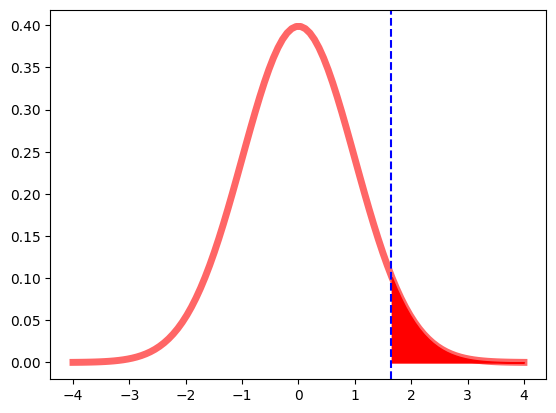

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Reject the null hypothesis.
(2.9417, 1.6448536269514722, True)


In [810]:

if __name__ == "__main__":

    print("What would you like to do?")
    print("1. 2 population means")
    print("2. 2 population proportions")
    print("3. 2 population variance")
    print("4. one population mean")
    print("5. one population proportion")
    
    choice = int(input("Enter a number: "))

    if(choice == 1):
        result = hypothesisTwoMeans()
    elif(choice == 2):
        result = hypothesisTwoProportions()
    elif(choice == 3):
        result = hypothesisTwoPopulationsF(
            float(input("variance of sample 1: ")), float(input("variance of sample 2: ")),
            int(input("sample size of 1: ")), int(input("sample size of 2: ")),
            float(input("level of significance: ")), input("tail: left, right, or two "))
    elif(choice == 4):
        result = hypothesisOneMean()
    elif (choice == 5):
        result = hypothesisOneProportion()

    print(result)